In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')

In [140]:
%cd /content/drive/MyDrive/AI_ML_CLass/upgrad/PROJETS/

/content/drive/MyDrive/AI_ML_CLass/upgrad/PROJETS


In [141]:
!ls

aus_housing_price_data_description.txt
Aus-Housing-price.ipynb
aus_housing_pricing.csv
bike_sharing.csv
bike-sharing-data-dict.txt
Bike-Sharing-Linear-Regression.ipynb
Lending-Case-Study-EDA.ipynb
lending_loan_data_dictionary.xlsx
Linear_Regression_Subjective_Questions.pdf
loan.csv


#### Loading data & Look Inside in Dataset:

In [142]:
housing_pd=pd.read_csv('aus_housing_pricing.csv')

In [143]:
##look into data

In [144]:
housing_pd.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [145]:
# datashape
housing_pd.shape

(1460, 81)

In [146]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

observation :

*   Many Features Columns contain missing values or Null values. 
*   Feature column PoolQC,MiscFeature,Fence,Alley,FireplaceQu contain more than 50% missing value or null value.



#### Missing Value Treatment :

In [147]:
# calculate percentage of missing value against each column

def missing_percetage(df) :
  df.isna().sum().sort_values(ascending=False)
  percentage = df.isna().sum().sort_values(ascending=False)/df.shape[0]
  print(pd.DataFrame({'features':percentage.index,'percentage':percentage.values}))

missing_percetage(housing_pd)

         features  percentage
0          PoolQC    0.995205
1     MiscFeature    0.963014
2           Alley    0.937671
3           Fence    0.807534
4     FireplaceQu    0.472603
5     LotFrontage    0.177397
6     GarageYrBlt    0.055479
7      GarageCond    0.055479
8      GarageType    0.055479
9    GarageFinish    0.055479
10     GarageQual    0.055479
11   BsmtFinType2    0.026027
12   BsmtExposure    0.026027
13       BsmtQual    0.025342
14       BsmtCond    0.025342
15   BsmtFinType1    0.025342
16     MasVnrArea    0.005479
17     MasVnrType    0.005479
18     Electrical    0.000685
19             Id    0.000000
20     Functional    0.000000
21     Fireplaces    0.000000
22    KitchenQual    0.000000
23   KitchenAbvGr    0.000000
24   BedroomAbvGr    0.000000
25       HalfBath    0.000000
26       FullBath    0.000000
27   BsmtHalfBath    0.000000
28   TotRmsAbvGrd    0.000000
29     GarageCars    0.000000
30      GrLivArea    0.000000
31     GarageArea    0.000000
32     Pav

observation : 

1.   We are given that NA value in feature Alley, Fence,FireplaceQu,PoolQC, GarageType having specific meanings. It means service not availabe in particular segment.
2.   MiscFeature contains more than 96% missing values. MiscVal also related to MiscFeature. So including the same into drop column list.

In [148]:
## drop MiscFeature and MiscVal.
housing_pd.drop(['MiscFeature','Id','MiscVal'],axis=1,inplace=True)

In [149]:
def categorical_missing_treatment(df,cols,replace_val) :
  for col in cols :
    print(f"Number of Nan values {col}==>",housing_pd[col].isna().sum())
    housing_pd[col]=housing_pd[col].fillna(replace_val)
    print(f"after treatment Number of Nan values in {col} ==>",housing_pd[col].isna().sum())

In [150]:
#replace NA value of PoolQC with 'No Pool'
pool_cols = ['PoolQC']
categorical_missing_treatment(housing_pd,pool_cols,'NO')

Number of Nan values PoolQC==> 1453
after treatment Number of Nan values in PoolQC ==> 0


In [151]:
fence_col = ['Fence']
categorical_missing_treatment(housing_pd,fence_col,'NO')

Number of Nan values Fence==> 1179
after treatment Number of Nan values in Fence ==> 0


In [152]:
fire_col = ['FireplaceQu']
categorical_missing_treatment(housing_pd,fire_col,'NO')

Number of Nan values FireplaceQu==> 690
after treatment Number of Nan values in FireplaceQu ==> 0


In [153]:
#replace NA value of PoolQC with 'No Pool'
alley_col = ['Alley']
categorical_missing_treatment(housing_pd,alley_col,'NO')

Number of Nan values Alley==> 1369
after treatment Number of Nan values in Alley ==> 0


In [154]:
## looing into GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt
## by loo king dataset description, we are given NA mean 'No garage' so, converting Nan into No Garage
garage_cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
categorical_missing_treatment(housing_pd,garage_cols,'NO')

Number of Nan values GarageType==> 81
after treatment Number of Nan values in GarageType ==> 0
Number of Nan values GarageFinish==> 81
after treatment Number of Nan values in GarageFinish ==> 0
Number of Nan values GarageQual==> 81
after treatment Number of Nan values in GarageQual ==> 0
Number of Nan values GarageCond==> 81
after treatment Number of Nan values in GarageCond ==> 0


In [155]:
# replace NA value with oldest years for example 1800
#housing_pd.GarageYrBlt.value_counts()
print(f"Number of Nan values GarageYrBlt==>",housing_pd['GarageYrBlt'].isna().sum())
housing_pd['GarageYrBlt']=housing_pd['GarageYrBlt'].fillna(1800)
print(f"Number of Nan values GarageYrBlt==>",housing_pd['GarageYrBlt'].isna().sum())

Number of Nan values GarageYrBlt==> 81
Number of Nan values GarageYrBlt==> 0


In [156]:
# looking into Basement type categorical feature for example BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1
bsmt_cols = ['BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1']
## by loo king dataset description, we are given NA mean 'No Basement' so, converting Nan into No Basement
categorical_missing_treatment(housing_pd,bsmt_cols,'NO')

Number of Nan values BsmtFinType2==> 38
after treatment Number of Nan values in BsmtFinType2 ==> 0
Number of Nan values BsmtExposure==> 38
after treatment Number of Nan values in BsmtExposure ==> 0
Number of Nan values BsmtQual==> 37
after treatment Number of Nan values in BsmtQual ==> 0
Number of Nan values BsmtCond==> 37
after treatment Number of Nan values in BsmtCond ==> 0
Number of Nan values BsmtFinType1==> 37
after treatment Number of Nan values in BsmtFinType1 ==> 0


In [157]:
## missing treatment of numeric value of MasVnrType with mode value
housing_pd['MasVnrType'] = housing_pd['MasVnrType'].fillna(housing_pd['MasVnrType'].mode()[0])

In [158]:
housing_pd.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [159]:
## replace missing value of MasVnrArea with None type median value
none_type_median = housing_pd[housing_pd.MasVnrType=='None'].MasVnrArea.median()
print("median of MasVnrArea of none type",none_type_median)
housing_pd['MasVnrArea']=housing_pd['MasVnrArea'].fillna(none_type_median)

median of MasVnrArea of none type 0.0


In [160]:
# replace na value of LotFrontage with median
lotfront_age_median=housing_pd['LotFrontage'].median()
print("median of LotFrontage",lotfront_age_median)
housing_pd['LotFrontage']=housing_pd['LotFrontage'].fillna(lotfront_age_median)

median of LotFrontage 69.0


In [161]:
# missing treatment of electrical feature
print("number of missing value of electrical column ",housing_pd.Electrical.isna().sum())
# since only 1 record having na value, then drop 
housing_pd=housing_pd[~housing_pd.Electrical.isna()]
housing_pd.reset_index()

number of missing value of electrical column  1


,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,RL,65.0,8450,Pave,NO,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NO,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NO,NO,2,2008,WD,Normal,208500
1,1,20,RL,80.0,9600,Pave,NO,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NO,NO,5,2007,WD,Normal,181500
2,2,60,RL,68.0,11250,Pave,NO,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NO,NO,9,2008,WD,Normal,223500
3,3,70,RL,60.0,9550,Pave,NO,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NO,NO,2,2006,WD,Abnorml,140000
4,4,60,RL,84.0,14260,Pave,NO,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NO,NO,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,60,RL,62.0,7917,Pave,NO,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NO,NO,8,2007,WD,Normal,175000
1455,1456,20,RL,85.0,13175,Pave,NO,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NO,MnPrv,2,2010,WD,Normal,210000
1456,1457,70,RL,66.0,9042,Pave,NO,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NO,GdPrv,5,2010,WD,Normal,266500
1457,1458,20,RL,68.0,9717,Pave,NO,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NO,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,

In [162]:
##chekcing missing value 
missing_percetage(housing_pd)

         features  percentage
0      MSSubClass         0.0
1        HalfBath         0.0
2     FireplaceQu         0.0
3      Fireplaces         0.0
4      Functional         0.0
5    TotRmsAbvGrd         0.0
6     KitchenQual         0.0
7    KitchenAbvGr         0.0
8    BedroomAbvGr         0.0
9        FullBath         0.0
10    GarageYrBlt         0.0
11   BsmtHalfBath         0.0
12   BsmtFullBath         0.0
13      GrLivArea         0.0
14   LowQualFinSF         0.0
15       2ndFlrSF         0.0
16       1stFlrSF         0.0
17     Electrical         0.0
18     GarageType         0.0
19   GarageFinish         0.0
20       MSZoning         0.0
21    ScreenPorch         0.0
22  SaleCondition         0.0
23       SaleType         0.0
24         YrSold         0.0
25         MoSold         0.0
26          Fence         0.0
27         PoolQC         0.0
28       PoolArea         0.0
29      3SsnPorch         0.0
30     GarageCars         0.0
31  EnclosedPorch         0.0
32    Open

In [163]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

#### EDA :

In [164]:
housing_pd.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [165]:
## Numeric & Categorical feature for EDA

#categorical features
nonordinal_cat_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
                'Exterior2nd','MasVnrType','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical',
                'Functional','GarageType','GarageFinish','Fence','Foundation','PavedDrive'
                ]

ordinal_cat_features = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond',
                        'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC'
                        ]

cat_fearures = nonordinal_cat_features.copy()
cat_fearures.extend(ordinal_cat_features)

# numeric Features
num_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch','PoolArea',
                ]

time_features = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

# target variable

target_col = 'SalePrice'

In [166]:
## Listing Unique Value of each Categorical Feature
for col in cat_fearures :
  print(f"feature colum {col} ==> ",housing_pd[col].unique())

feature colum MSSubClass ==>  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
feature colum MSZoning ==>  ['RL' 'RM' 'C (all)' 'FV' 'RH']
feature colum Street ==>  ['Pave' 'Grvl']
feature colum Alley ==>  ['NO' 'Grvl' 'Pave']
feature colum LotShape ==>  ['Reg' 'IR1' 'IR2' 'IR3']
feature colum LandContour ==>  ['Lvl' 'Bnk' 'Low' 'HLS']
feature colum Utilities ==>  ['AllPub' 'NoSeWa']
feature colum LotConfig ==>  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
feature colum LandSlope ==>  ['Gtl' 'Mod' 'Sev']
feature colum Neighborhood ==>  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
feature colum Condition1 ==>  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
feature colum Condition2 ==>  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
feature colum

##### Categorical Features EDA :

In [167]:
# function for box plot of categorical Features
def cat_feature_plot(i, col_i,col_o):
    plt.figure(i)
    variables = housing_pd[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    sns.boxplot(x=col_i, y=col_o, data=housing_pd[[col_i,col_o]])

In [168]:
# transform ordinal categorical value with order
housing_pd['OverallQual']=pd.Categorical(housing_pd['OverallQual'],[1,2,3,4,5,6,7,8,9,10],ordered=True)
housing_pd['OverallCond']=pd.Categorical(housing_pd['OverallCond'],[1,2,3,4,5,6,7,8,9],ordered=True)
housing_pd['ExterQual']=pd.Categorical(housing_pd['ExterQual'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['ExterCond']=pd.Categorical(housing_pd['ExterCond'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['BsmtQual']=pd.Categorical(housing_pd['BsmtQual'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['BsmtCond']=pd.Categorical(housing_pd['BsmtCond'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['HeatingQC']=pd.Categorical(housing_pd['HeatingQC'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['KitchenQual']=pd.Categorical(housing_pd['KitchenQual'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['FireplaceQu']=pd.Categorical(housing_pd['FireplaceQu'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['GarageQual']=pd.Categorical(housing_pd['GarageQual'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['GarageCond']=pd.Categorical(housing_pd['GarageCond'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)
housing_pd['PoolQC']=pd.Categorical(housing_pd['PoolQC'],['NO','Po','Fa','TA','Gd','Ex'],ordered=True)

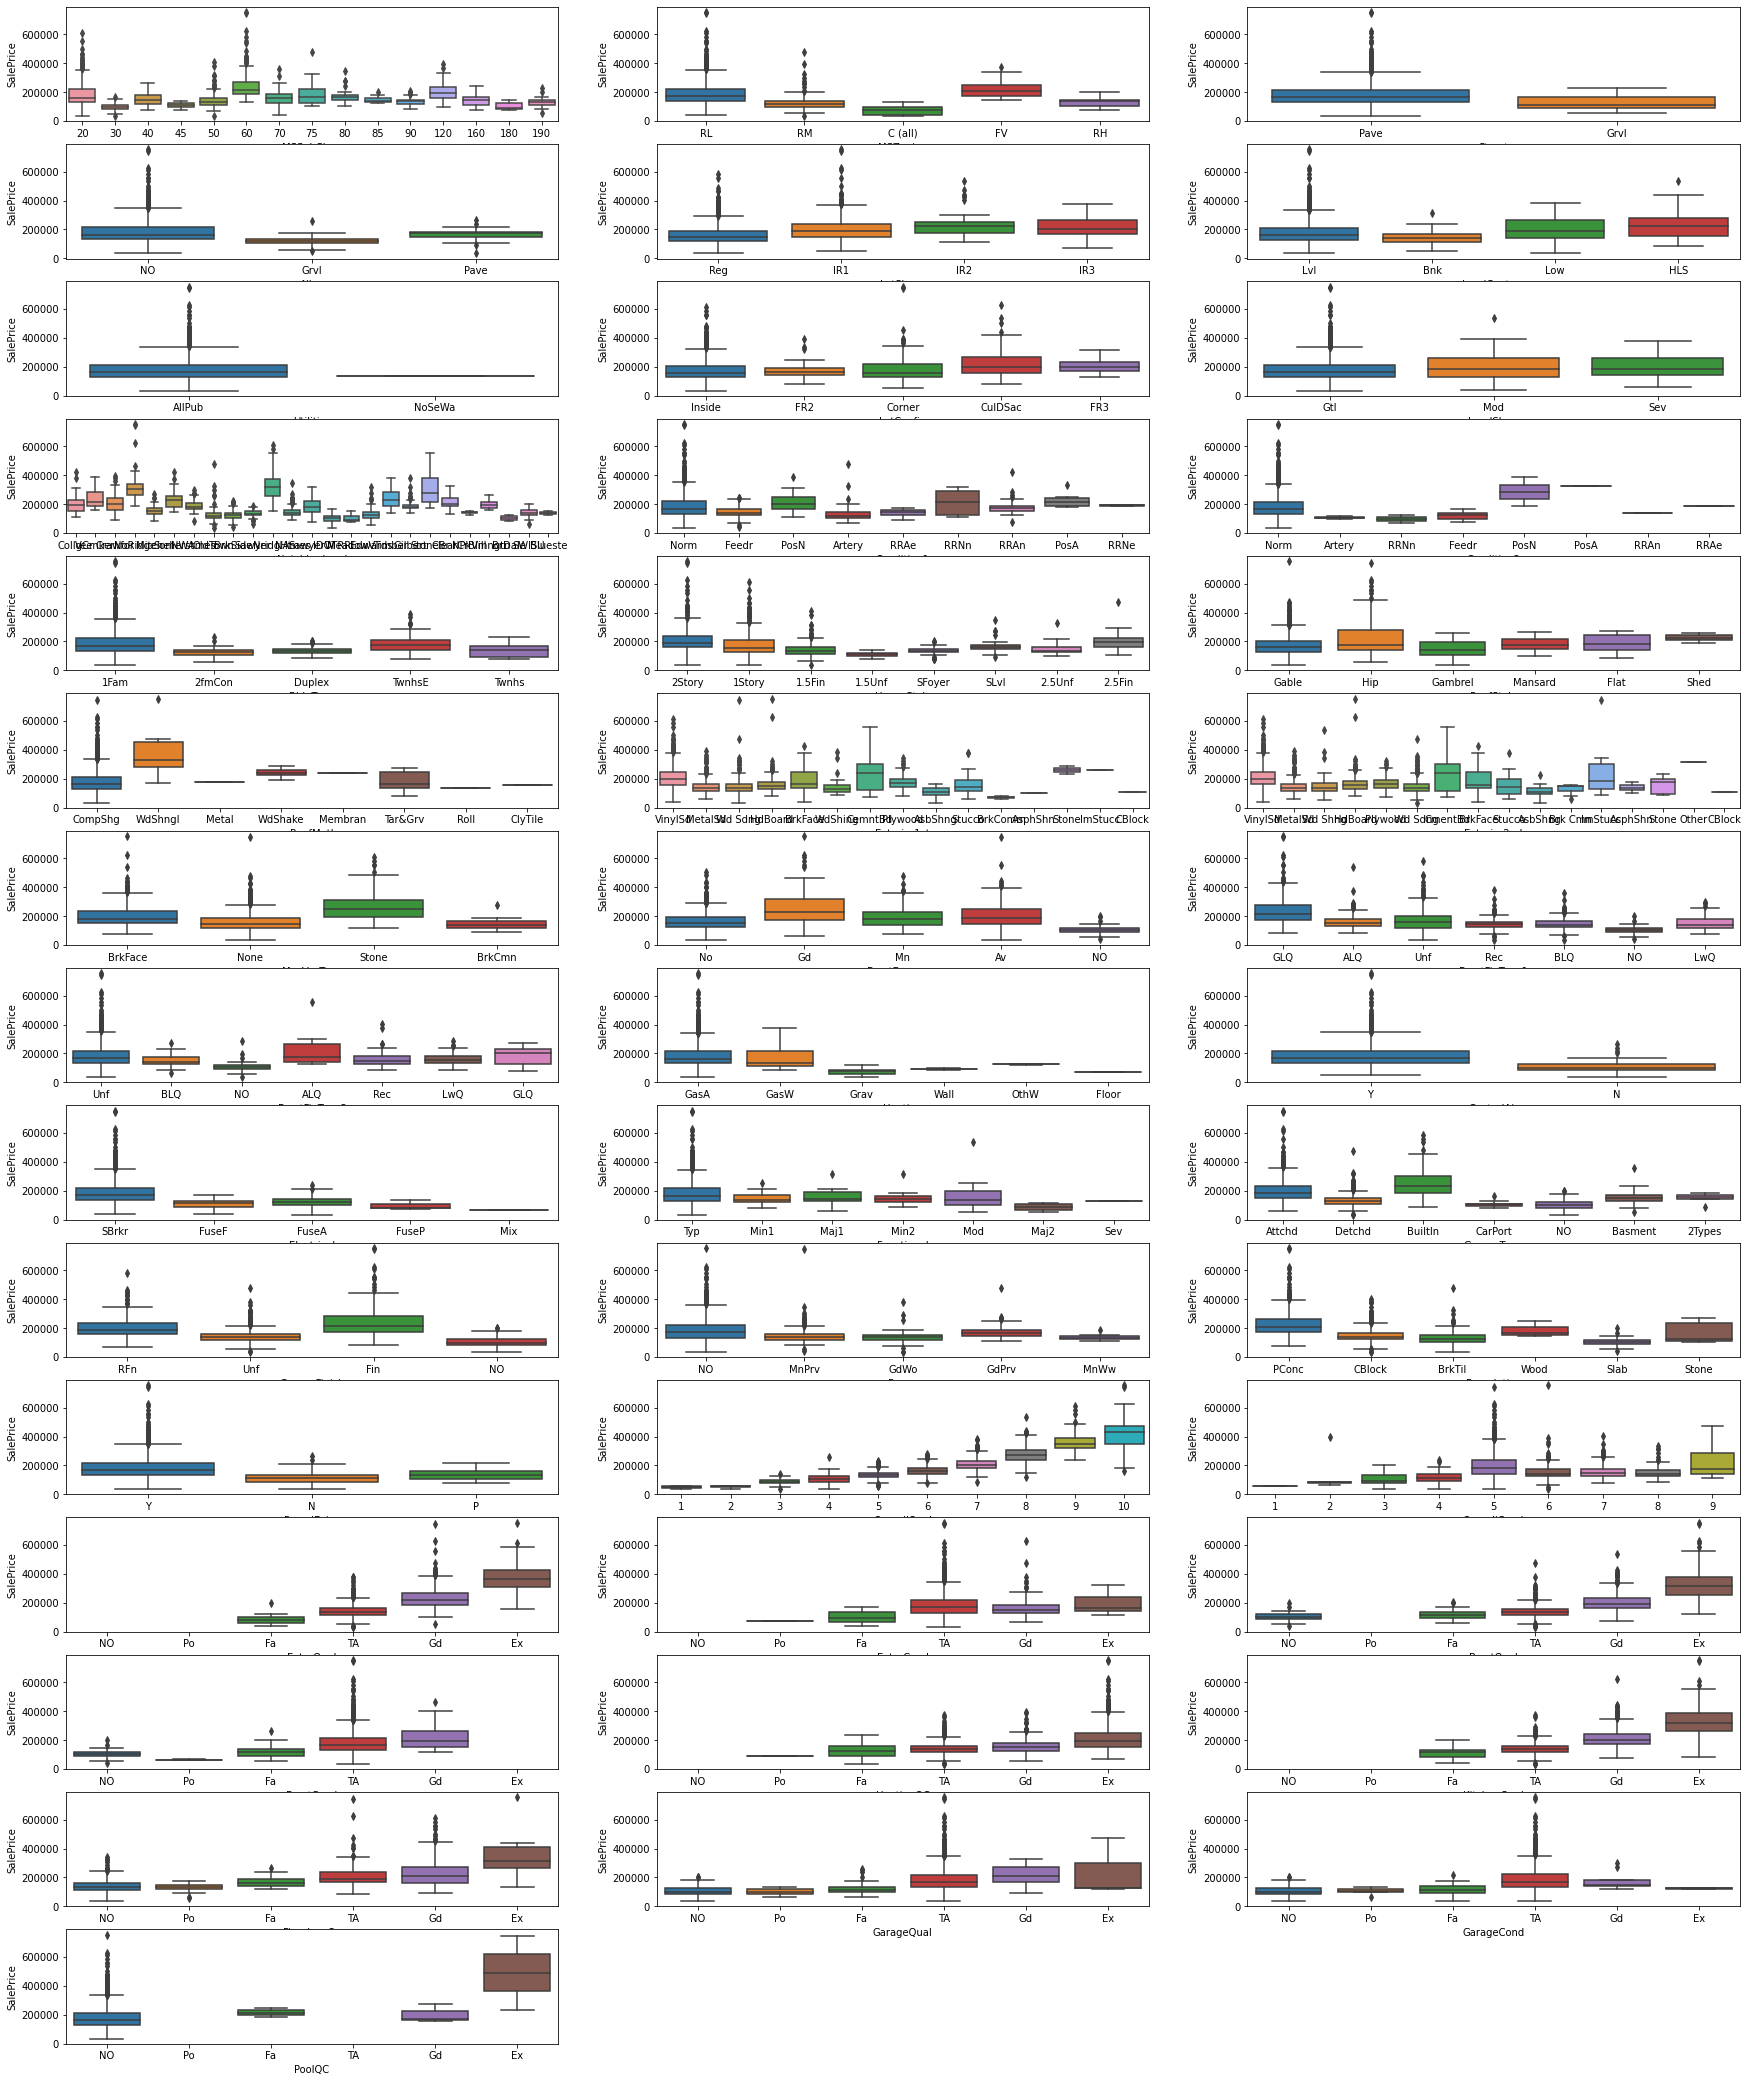

In [169]:
# categorical variable box plot along with saleprice
## distribution of each numeric feature 
plt.figure(figsize = (30, 40))

for i,col in enumerate(cat_fearures) :

    plt.subplot(16,3,i+1)
    sns.boxplot(x=col, y=target_col, data=housing_pd[[col,target_col]])
            
plt.show()

observation : 

1.   house sale price increases according as goodness increase of overall conditions, quality,PoolQC,GarageQuality,KitchenQuality,FirePlace Quality, Basement Condition and Quality,
2.  Attached & Builtin Garage Type having higher house Price.
3.  Hihger house price of GLQ Basment Fin Type.
4.  Exposed basement having higher price than no exposure or no basement.
 



##### Numerical Features EDA :

In [170]:
# distribution of numeric features
housing_pd[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1459.0,69.861549,22.035077,21.0,60.0,69.0,79.0,313.0
LotArea,1459.0,10517.363948,9984.666267,1300.0,7549.0,9477.0,11603.0,215245.0
MasVnrArea,1459.0,103.187800,180.773158,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1459.0,443.943797,456.106417,0.0,0.0,384.0,712.5,5644.0
BsmtFinSF2,1459.0,46.581220,161.369977,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1459.0,567.366004,441.992392,0.0,223.0,479.0,808.0,2336.0
TotalBsmtSF,1459.0,1057.891021,438.500975,0.0,796.0,992.0,1298.5,6110.0
1stFlrSF,1459.0,1162.906785,386.572089,334.0,882.0,1088.0,1391.5,4692.0
2ndFlrSF,1459.0,346.791638,436.610637,0.0,0.0,0.0,728.0,2065.0
LowQualFinSF,1459.0,5.848526,48.639512,0.0,0.0,0.0,0.0,572.0


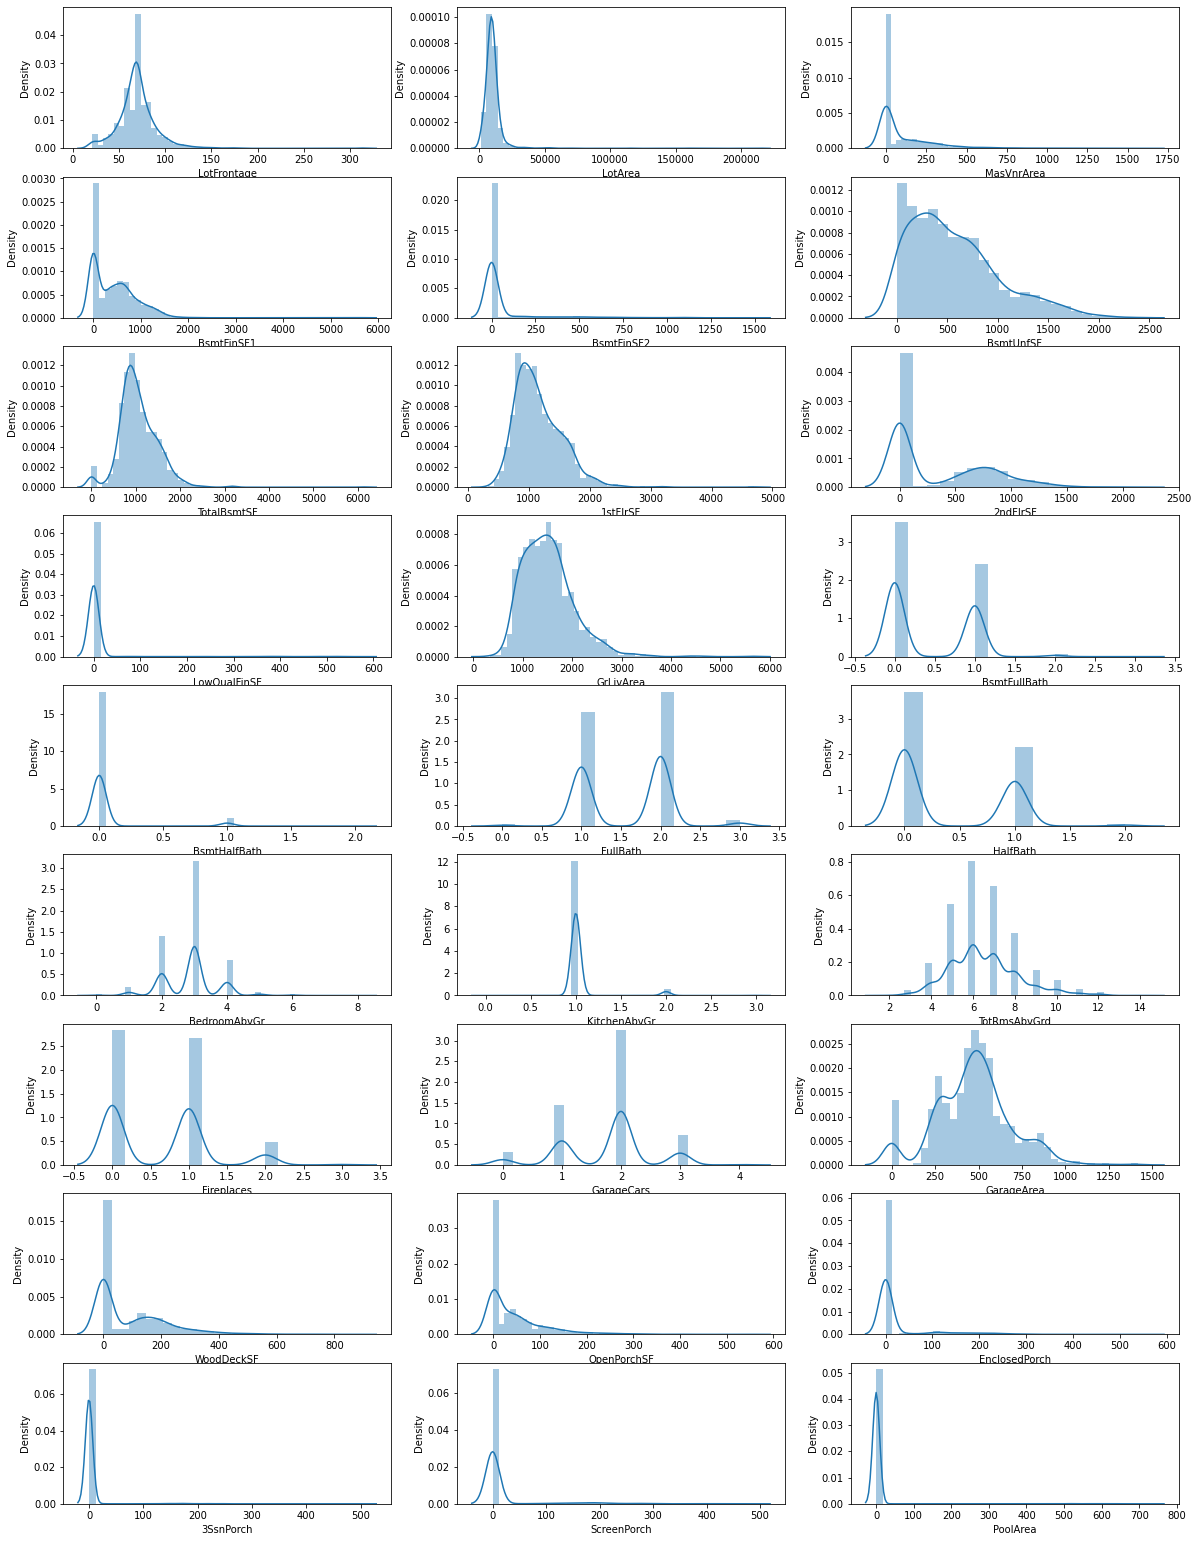

In [171]:
## distribution of each numeric feature 
plt.figure(figsize = (20, 40))

for i,col in enumerate(num_features) :

    plt.subplot(13,3,i+1)
    sns.distplot(housing_pd[col])
            
plt.show()

observation : 

1.   Numeric features distribution plot are not normal distribution.
2.   Many features contain long tail. Which tell data is not evenly distributed but it is  skewed. 
3.   Numeric features also contains many outlier data points. 



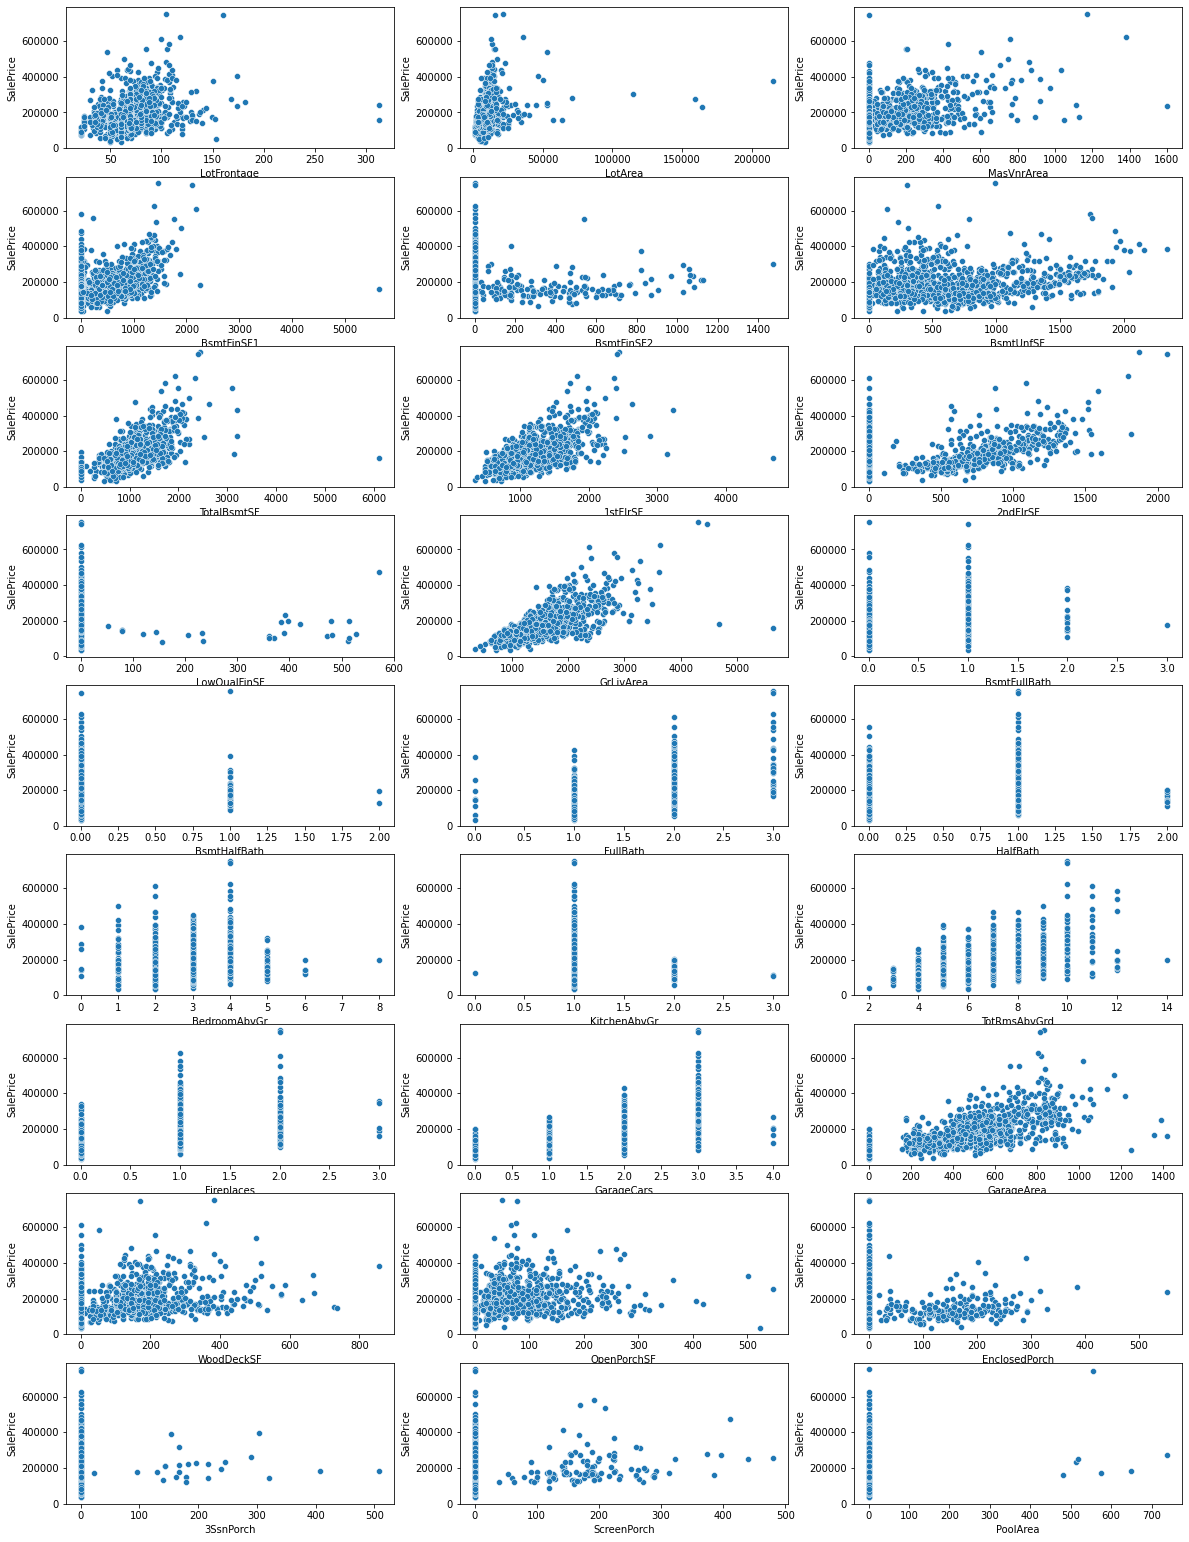

In [172]:
## scatter plot b/w target and numeric feature
plt.figure(figsize = (20, 40))

for i,col in enumerate(num_features) :

    plt.subplot(13,3,i+1)
    sns.scatterplot(x=col,y=target_col, data = housing_pd)
            
plt.show()

observation :

1.   By looking scatter plot , there are some features column are linearly depandant.



##### Outlier Treatment :

In [173]:
# function to return upper limit & lower limit 
def outlier_val_func(x,q1,q3,iqr) :
  if x > q3+1.5*iqr :
    return q3+0.99*iqr
  elif x < q1-1.5*iqr :
    return  q1-0.99*iqr
  else :
    return x

# it is not wise to remove outlier,
# replacing higher & lower value with q3+0.99IQR and q1-0.99IQR
def outlier_rplc(df,func_rplc) :
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  iqr=q3-q1
  return df.apply(lambda x : func_rplc(x,q1,q3,iqr))

In [174]:
for col in num_features :
  housing_pd[col]=outlier_rplc(housing_pd[col],outlier_val_func)

In [175]:
housing_pd[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1459.0,69.021316,15.822712,32.0,60.0,69.0,79.0,107.0
LotArea,1459.0,9554.269609,3402.436950,1477.0,7549.0,9477.0,11603.0,17671.0
MasVnrArea,1459.0,83.874428,121.685024,0.0,0.0,0.0,164.5,410.0
BsmtFinSF1,1459.0,438.558687,428.526596,0.0,0.0,384.0,712.5,1767.0
BsmtFinSF2,1459.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
BsmtUnfSF,1459.0,557.970768,418.213977,0.0,223.0,479.0,808.0,1680.0
TotalBsmtSF,1459.0,1053.005363,373.268406,105.0,796.0,992.0,1298.5,2046.0
1stFlrSF,1459.0,1153.740987,353.918068,334.0,882.0,1088.0,1391.5,2136.0
2ndFlrSF,1459.0,346.079123,434.365747,0.0,0.0,0.0,728.0,1818.0
LowQualFinSF,1459.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


#### Preprocessing Data :

##### Drive Feature

In [176]:
time_features = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

In [177]:
housing_pd['HouseAge']=pd.datetime.now().year - housing_pd['YearBuilt']
housing_pd['HouseGarageAge']=pd.datetime.now().year - housing_pd['GarageYrBlt']
housing_pd['HouseRemodelAge']=pd.datetime.now().year - housing_pd['YearRemodAdd']

In [178]:
housing_pd['HouseRemodel']=housing_pd[['YearBuilt','YearRemodAdd']].apply(lambda x: 1 if x.YearBuilt!=x.YearRemodAdd else 0,axis=1)

##### drop unnecessary colums

In [179]:
## drop YearBuilt,GarageYrBlt,YearRemodAdd
housing_pd.drop(columns=['YearBuilt','GarageYrBlt','YearRemodAdd'],axis=1,inplace=True)

In [180]:
## drop sale variable because I am assuming they are not present at time of model prediction
housing_pd.drop(columns=['SaleCondition','SaleType','YrSold','MoSold'],axis=1,inplace=True)

##### Dummy Features Creation :

In [181]:
# Making Dummies of all categorical Features
housing_pd = pd.get_dummies(housing_pd,columns=cat_fearures, drop_first = True)

In [182]:
housing_pd.shape

(1459, 279)

In [183]:
housing_pd.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,HouseAge,HouseGarageAge,HouseRemodelAge,HouseRemodel,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NO,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NO,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NO,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NO,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO,GarageFinish_NO,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NO,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,PavedDrive_P,PavedDrive_Y,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,ExterQual_Po,ExterQual_Fa,ExterQual_TA,ExterQual_Gd,ExterQual_Ex,ExterCond_Po,ExterCond_Fa,ExterCond_TA,ExterCond_Gd,ExterCond_Ex,BsmtQual_Po,BsmtQual_Fa,BsmtQual_TA,BsmtQual_Gd,BsmtQual_Ex,BsmtCond_Po,BsmtCond_Fa,BsmtCond_TA,BsmtCond_Gd,BsmtCond_Ex,HeatingQC_Po,HeatingQC_Fa,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Ex,KitchenQual_Po,KitchenQual_Fa,KitchenQual_TA,KitchenQ


#### corelation analysis :

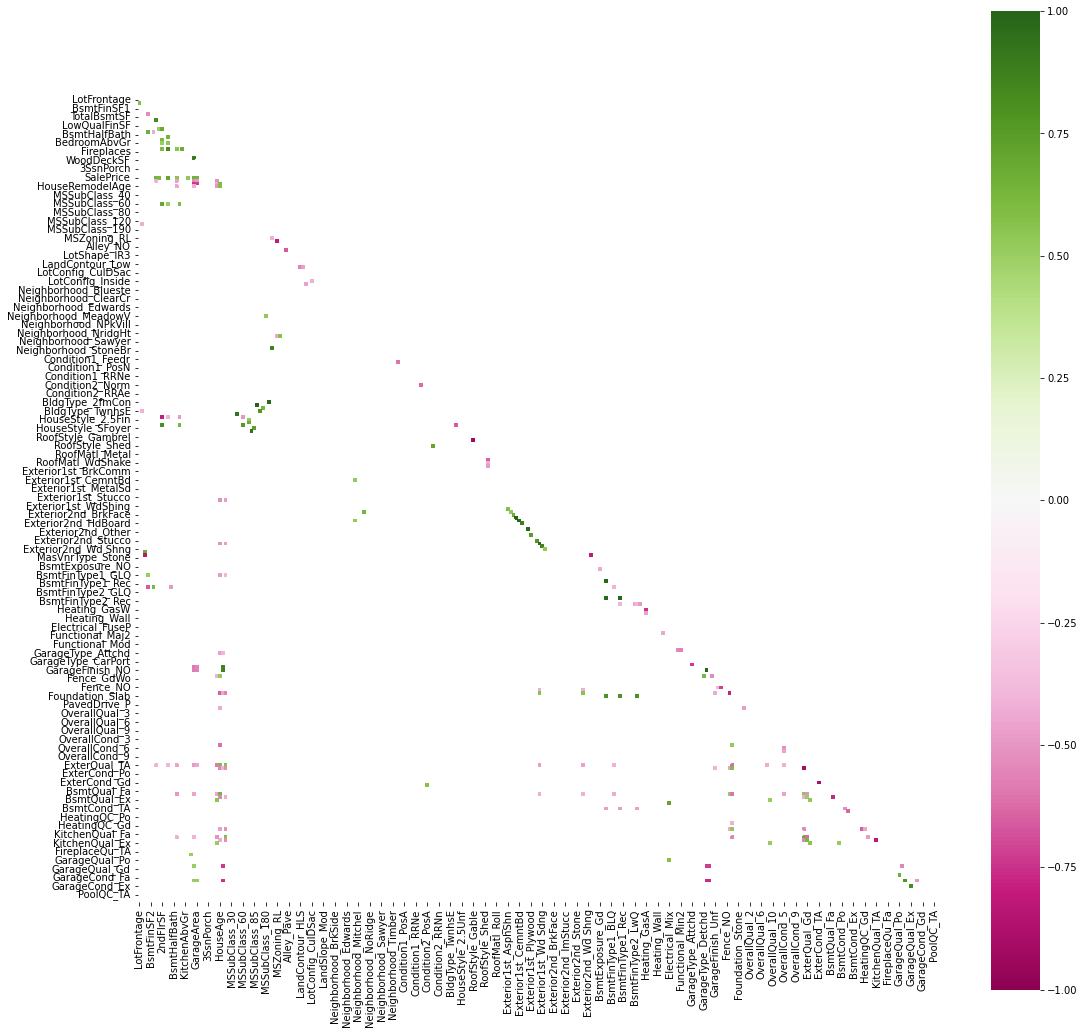

In [184]:
# plotting correlations on a heatmap

# naive way 
corr = housing_pd.corr()

# corr
plt.figure(figsize=(18,18))
# Triangle Matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# plotting correlations on a heatmap
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], mask=mask,
            cmap='PiYG', vmax=1.0, vmin=-1.0, 
             square=True);

observation : many indepedent features are colinear to each other.

In [185]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 279 entries, LotFrontage to PoolQC_Ex
dtypes: float64(26), int64(6), uint8(247)
memory usage: 760.4 KB


##### Train & Test split  

In [186]:
# Preparing Test and Train Set
df_train, df_test = train_test_split(housing_pd, train_size = 0.7, 
                                     test_size = 0.3, random_state = 1)

##### Scale Numeric Features

In [187]:
std_scaler = StandardScaler()

In [188]:
continuous_features=housing_pd.select_dtypes(include=['int64','float64']).columns
print(continuous_features)
## first fit on train dataset and then transform
df_train[continuous_features]=std_scaler.fit_transform(df_train[continuous_features])
## sacaling the test data set using same std_scale
df_test[continuous_features]=std_scaler.transform(df_test[continuous_features])

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice',
       'HouseAge', 'HouseGarageAge', 'HouseRemodelAge', 'HouseRemodel'],
      dtype='object')


In [189]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,HouseAge,HouseGarageAge,HouseRemodelAge,HouseRemodel,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NO,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NO,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NO,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NO,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO,GarageFinish_NO,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NO,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,PavedDrive_P,PavedDrive_Y,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,ExterQual_Po,ExterQual_Fa,ExterQual_TA,ExterQual_Gd,ExterQual_Ex,ExterCond_Po,ExterCond_Fa,ExterCond_TA,ExterCond_Gd,ExterCond_Ex,BsmtQual_Po,BsmtQual_Fa,BsmtQual_TA,BsmtQual_Gd,BsmtQual_Ex,BsmtCond_Po,BsmtCond_Fa,BsmtCond_TA,BsmtCond_Gd,BsmtCond_Ex,HeatingQC_Po,HeatingQC_Fa,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Ex,KitchenQual_Po,KitchenQual_Fa,KitchenQual_TA,KitchenQ

In [190]:
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,HouseAge,HouseGarageAge,HouseRemodelAge,HouseRemodel,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NO,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NO,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NO,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NO,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO,GarageFinish_NO,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NO,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,PavedDrive_P,PavedDrive_Y,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,ExterQual_Po,ExterQual_Fa,ExterQual_TA,ExterQual_Gd,ExterQual_Ex,ExterCond_Po,ExterCond_Fa,ExterCond_TA,ExterCond_Gd,ExterCond_Ex,BsmtQual_Po,BsmtQual_Fa,BsmtQual_TA,BsmtQual_Gd,BsmtQual_Ex,BsmtCond_Po,BsmtCond_Fa,BsmtCond_TA,BsmtCond_Gd,BsmtCond_Ex,HeatingQC_Po,HeatingQC_Fa,HeatingQC_TA,HeatingQC_Gd,HeatingQC_Ex,KitchenQual_Po,KitchenQual_Fa,KitchenQual_TA,KitchenQ

##### features & Target Seperation :

In [191]:
#function to seperate features & target columns.
def get_feature_and_target(df) :
  features=df.drop(columns=['SalePrice'],axis=1)
  target = df['SalePrice']
  return features,target

In [192]:
## xtrain and ytrain
Xtrain,ytrain=get_feature_and_target(df_train)

In [193]:
## xtest and ytest
Xtest,ytest=get_feature_and_target(df_test)

In [194]:
Xtrain.shape

(1021, 278)

In [195]:
Xtest.shape

(438, 278)

#### Model Building

In [196]:
## making list to compare result of different model
test_r2_score_list  = []
train_r2_score_list = []
estimator_name_list = []
test_mse_score_list = []
train_mse_score_list  =[]

In [197]:
# score to print
def print_and_store_score(estimator,estimator_nm) :
  # score
  ytrain_pred=estimator.predict(Xtrain)
  ytest_pred=estimator.predict(Xtest)

  # r2 score
  train_r2 = r2_score(y_true=ytrain,y_pred=ytrain_pred)
  test_r2 = r2_score(y_true=ytest,y_pred=ytest_pred)

  # mse
  train_mse = mean_squared_error(y_true=ytrain,y_pred=ytrain_pred)
  test_mse = mean_squared_error(y_true=ytest,y_pred=ytest_pred)


  # set into list
  test_r2_score_list.append(test_r2)
  train_r2_score_list.append(train_r2)
  test_mse_score_list.append(test_mse)
  train_mse_score_list.append(train_mse)
  estimator_name_list.append(estimator_nm)

  # print
  print(f"train r2 score : {train_r2}, mse : {train_mse} ")
  print(f"test r2 score : {test_r2}, mse : {test_mse} ")

1. Multiple Linear Regression

In [198]:
## creating linear Regression model without using regularlization
## model-1
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression()

In [199]:
print_and_store_score(lr,'Linear Regression')

train r2 score : 0.942078593327719, mse : 0.05792140667228098 
test r2 score : -3.997702085017007e+17, mse : 3.432623608465385e+17 


##### 2. Ridge Regression

In [200]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 16, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)          
ridge_model_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 16, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
19,8.0,-0.175110,-0.217210,1
20,9.0,-0.176310,-0.217262,2
18,7.0,-0.173846,-0.217295,3
17,6.0,-0.172523,-0.217445,4
21,10.0,-0.177455,-0.217455,5
16,5.0,-0.171132,-0.217742,6
15,4.0,-0.169548,-0.218232,7
14,3.0,-0.167664,-0.218859,8
22,16,-0.183366,-0.218987,9
23,20,-0.186710,-0.220159,10


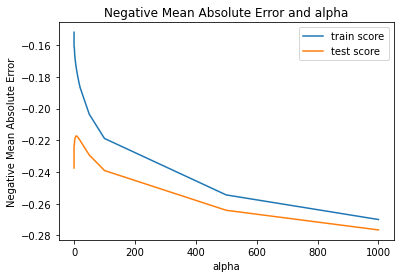

In [202]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [203]:
ridge_model_cv.best_estimator_

Ridge(alpha=8.0)

In [204]:
# creating ridge using alpha 8.0
alpha = 8.0
ridge = Ridge(alpha=alpha)
ridge.fit(Xtrain, ytrain)

Ridge(alpha=8.0)

In [205]:
# get train & test score
print_and_store_score(ridge,"Ridge Regression with alpha 8.0")

train r2 score : 0.9147682461221246, mse : 0.08523175387787546 
test r2 score : 0.8579495533059832, mse : 0.12197149926264736 


In [206]:
## listing model parameter and sort them according to coef values
features_cols_name = list(Xtrain.columns)
model_parameter_coef=list(ridge.coef_)
model_parameters=sorted(list(zip(features_cols_name,model_parameter_coef)), key=lambda x:abs(x[1]), reverse=True)
top_ridge_features= []
for col,_ in model_parameters[0:50] :
  top_ridge_features.append(col)
model_parameters

[('OverallQual_10', 0.4891416239649462),
 ('Neighborhood_StoneBr', 0.41062618859590455),
 ('Condition2_PosN', -0.3769339192256552),
 ('RoofMatl_WdShngl', 0.34806255696735555),
 ('2ndFlrSF', 0.32903230979329184),
 ('Neighborhood_NoRidge', 0.32861361708496606),
 ('PoolQC_Ex', 0.2572374106753196),
 ('1stFlrSF', 0.24245382157761344),
 ('Condition2_Norm', 0.23725988939661818),
 ('BsmtExposure_Gd', 0.23713369498146603),
 ('KitchenQual_Ex', 0.223699099125737),
 ('ExterQual_Ex', 0.21830772212023825),
 ('RoofMatl_CompShg', -0.20829865809478476),
 ('OverallQual_9', 0.2024994223497916),
 ('Neighborhood_NridgHt', 0.19467870167227772),
 ('OverallCond_9', 0.18205754174442534),
 ('Neighborhood_Edwards', -0.18006197269855065),
 ('Functional_Typ', 0.17390570014548437),
 ('BsmtQual_Ex', 0.17351142132948444),
 ('OverallCond_3', -0.15701086668043795),
 ('Exterior2nd_ImStucc', 0.15649075414756486),
 ('OverallQual_5', -0.15593568802636112),
 ('RoofMatl_Tar&Grv', -0.14787510008012256),
 ('Neighborhood_Mitche

In [207]:
# top 50 ridge features
top_ridge_features

['OverallQual_10',
 'Neighborhood_StoneBr',
 'Condition2_PosN',
 'RoofMatl_WdShngl',
 '2ndFlrSF',
 'Neighborhood_NoRidge',
 'PoolQC_Ex',
 '1stFlrSF',
 'Condition2_Norm',
 'BsmtExposure_Gd',
 'KitchenQual_Ex',
 'ExterQual_Ex',
 'RoofMatl_CompShg',
 'OverallQual_9',
 'Neighborhood_NridgHt',
 'OverallCond_9',
 'Neighborhood_Edwards',
 'Functional_Typ',
 'BsmtQual_Ex',
 'OverallCond_3',
 'Exterior2nd_ImStucc',
 'OverallQual_5',
 'RoofMatl_Tar&Grv',
 'Neighborhood_Mitchel',
 'OverallCond_4',
 'Neighborhood_NAmes',
 'OverallQual_6',
 'Exterior1st_BrkFace',
 'OverallQual_4',
 'OverallQual_3',
 'LotConfig_CulDSac',
 'Neighborhood_Crawfor',
 'Condition1_RRAe',
 'Condition1_Norm',
 'BldgType_Duplex',
 'MSSubClass_90',
 'LotShape_IR3',
 'TotalBsmtSF',
 'Neighborhood_NWAmes',
 'Neighborhood_Gilbert',
 'LandContour_HLS',
 'MSZoning_FV',
 'FireplaceQu_Fa',
 'HouseAge',
 'ExterQual_Fa',
 'PoolQC_Gd',
 'OverallCond_7',
 'KitchenQual_TA',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer']

##### doubling alpha parameter

In [208]:
# creating ridge using alpha 8.0
alpha = 16.0
ridge = Ridge(alpha=alpha)
ridge.fit(Xtrain, ytrain)

##
# get train & test score
print_and_store_score(ridge,"Ridge Regression_with alpha 16")

# model coef after doubling apha 
features_cols_name = list(Xtrain.columns)
model_parameter_coef=list(ridge.coef_)
model_parameters=sorted(list(zip(features_cols_name,model_parameter_coef)), key=lambda x:abs(x[1]), reverse=True)
model_parameters[0:20]

train r2 score : 0.9049354927832448, mse : 0.0950645072167552 
test r2 score : 0.8628342581883384, mse : 0.1177772514315244 


[('OverallQual_10', 0.36272625255000324),
 ('Neighborhood_StoneBr', 0.2971098082339202),
 ('2ndFlrSF', 0.28823435969727035),
 ('Neighborhood_NoRidge', 0.2723762692272622),
 ('RoofMatl_WdShngl', 0.229973691760992),
 ('KitchenQual_Ex', 0.22871041535632755),
 ('BsmtExposure_Gd', 0.21356484817194943),
 ('ExterQual_Ex', 0.21193389218617623),
 ('1stFlrSF', 0.20862485717437704),
 ('Condition2_PosN', -0.20085919151947643),
 ('BsmtQual_Ex', 0.1760635471327914),
 ('Neighborhood_NridgHt', 0.16118715471818),
 ('Functional_Typ', 0.15953193995480522),
 ('OverallQual_9', 0.15804951724556598),
 ('RoofMatl_CompShg', -0.15583103168179321),
 ('Condition2_Norm', 0.1542096524524302),
 ('PoolQC_Ex', 0.14823435419150752),
 ('Neighborhood_Edwards', -0.14747568757878934),
 ('OverallCond_9', 0.13656382992190882),
 ('OverallCond_4', -0.13141187885306838)]

##### Lasso Regression

In [209]:
params = {'alpha': [0.0001, 0.001,0.002, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds=5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.01, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [210]:
# display the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.170181,-0.211777,1
2,0.002,-0.179958,-0.213673,2
0,0.0001,-0.154250,-0.223857,3
3,0.01,-0.231594,-0.245764,4
4,0.1,-0.296604,-0.300442,5
5,0.2,-0.344584,-0.346277,6
6,0.3,-0.422562,-0.423916,7
7,0.4,-0.498023,-0.499601,8
8,0.5,-0.575734,-0.577285,9
9,0.6,-0.648527,-0.648936,10


In [211]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [212]:
# creating ridge using alpha 0.001
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(Xtrain, ytrain)

Lasso(alpha=0.001)

In [213]:
# get train & test score
print_and_store_score(lasso,"Lasso Regression with alpha_0.001")

train r2 score : 0.928179746393343, mse : 0.07182025360665704 
test r2 score : 0.8334368476821419, mse : 0.14301931379267938 


In [214]:
## listing model parameter and sort them according to coef values
features_cols_name = list(Xtrain.columns)
model_parameter_coef=list(lasso.coef_)
model_parameters=sorted(list(zip(features_cols_name,model_parameter_coef)), key=lambda x:abs(x[1]), reverse=True)
top_lasso_features= []
for col,_ in model_parameters[0:50] :
  top_lasso_features.append(col)
model_parameters

[('Condition2_PosN', -3.3533054221415943),
 ('OverallQual_10', 1.1468650444162543),
 ('RoofMatl_WdShngl', 0.8969743904641432),
 ('PoolQC_Ex', 0.7290397856972011),
 ('Neighborhood_StoneBr', 0.5833711833096159),
 ('OverallQual_9', 0.5089835348038504),
 ('Neighborhood_NoRidge', 0.3926257659129481),
 ('2ndFlrSF', 0.3904023764844805),
 ('1stFlrSF', 0.3153659604568208),
 ('BsmtExposure_Gd', 0.2780243057416391),
 ('KitchenQual_Ex', 0.26133264485543006),
 ('Neighborhood_Crawfor', 0.2230983509629269),
 ('ExterQual_Ex', 0.2213898627683489),
 ('BsmtQual_Ex', 0.21382250049484744),
 ('Neighborhood_NridgHt', 0.21355633885538067),
 ('OverallCond_3', -0.20942838016123336),
 ('Functional_Typ', 0.18520444936568028),
 ('OverallCond_4', -0.1795574056350986),
 ('OverallQual_8', 0.17921758960836598),
 ('MSSubClass_90', -0.17814208502996876),
 ('Exterior1st_BrkFace', 0.1755673037965466),
 ('LotShape_IR3', 0.14652997816562782),
 ('GrLivArea', -0.13978892170386323),
 ('HouseAge', -0.13578156455229054),
 ('Cond

In [215]:
# print top feature display
top_lasso_features

['Condition2_PosN',
 'OverallQual_10',
 'RoofMatl_WdShngl',
 'PoolQC_Ex',
 'Neighborhood_StoneBr',
 'OverallQual_9',
 'Neighborhood_NoRidge',
 '2ndFlrSF',
 '1stFlrSF',
 'BsmtExposure_Gd',
 'KitchenQual_Ex',
 'Neighborhood_Crawfor',
 'ExterQual_Ex',
 'BsmtQual_Ex',
 'Neighborhood_NridgHt',
 'OverallCond_3',
 'Functional_Typ',
 'OverallCond_4',
 'OverallQual_8',
 'MSSubClass_90',
 'Exterior1st_BrkFace',
 'LotShape_IR3',
 'GrLivArea',
 'HouseAge',
 'Condition1_RRAe',
 'OverallCond_9',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Condition1_Norm',
 'Neighborhood_Somerst',
 'TotalBsmtSF',
 'MSSubClass_190',
 'MSSubClass_120',
 'OverallCond_5',
 'Neighborhood_Edwards',
 'GarageType_CarPort',
 'OverallQual_7',
 'Neighborhood_NAmes',
 'OverallCond_7',
 'Neighborhood_Mitchel',
 'LotArea',
 'BsmtFinSF1',
 'LotConfig_FR2',
 'LandContour_Low',
 'FireplaceQu_Ex',
 'MasVnrType_Stone',
 'Condition2_Norm',
 'Neighborhood_NWAmes',
 'Exterior2nd_ImStucc',
 'LotShape_IR2']

In [216]:
## doubling alpha parameter
# creating ridge using alpha 8.0
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(Xtrain, ytrain)

##
# get train & test score
print_and_store_score(lasso,"Lass Regression_with alpha 0.002")

# model coef after doubling apha 
features_cols_name = list(Xtrain.columns)
model_parameter_coef=list(lasso.coef_)
model_parameters=sorted(list(zip(features_cols_name,model_parameter_coef)), key=lambda x:abs(x[1]), reverse=True)
model_parameters[0:20]

train r2 score : 0.9152527850225091, mse : 0.08474721497749095 
test r2 score : 0.8561724513614337, mse : 0.12349740638623545 


[('Condition2_PosN', -2.101730470022199),
 ('OverallQual_10', 1.0667070700595709),
 ('RoofMatl_WdShngl', 0.65150913762827),
 ('Neighborhood_StoneBr', 0.5095927634600115),
 ('OverallQual_9', 0.4493458092339428),
 ('Neighborhood_NoRidge', 0.3980357551010922),
 ('2ndFlrSF', 0.3270636553868147),
 ('KitchenQual_Ex', 0.2810687069710022),
 ('1stFlrSF', 0.2583810413544561),
 ('BsmtQual_Ex', 0.24801239306764264),
 ('BsmtExposure_Gd', 0.24335518047087842),
 ('Neighborhood_Crawfor', 0.2103686959172543),
 ('Neighborhood_NridgHt', 0.20228423569811313),
 ('ExterQual_Ex', 0.19828733304600327),
 ('PoolQC_Ex', 0.19422336752005953),
 ('Functional_Typ', 0.1935494715373101),
 ('OverallQual_8', 0.16404894894839064),
 ('OverallCond_4', -0.1563516274455205),
 ('Exterior1st_BrkFace', 0.14871433473002102),
 ('MSSubClass_90', -0.14219290433804427)]

In [221]:
## Question-3 removing top 5 feature from Xtrain
Xtrain_new = Xtrain.drop(columns=top_lasso_features[0:5],axis=1)
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(Xtrain_new, ytrain)


# model coef after doubling apha 
features_cols_name = list(Xtrain_new.columns)
model_parameter_coef=list(lasso.coef_)
model_parameters=sorted(list(zip(features_cols_name,model_parameter_coef)), key=lambda x:abs(x[1]), reverse=True)
model_parameters[0:20]

[('RoofMatl_Tar&Grv', -0.44762172204731043),
 ('RoofMatl_CompShg', -0.4380368037942695),
 ('Neighborhood_NoRidge', 0.4241786122376269),
 ('KitchenQual_Ex', 0.39533339998719585),
 ('ExterQual_Ex', 0.39387681961716997),
 ('2ndFlrSF', 0.37010862647912096),
 ('Condition2_Norm', 0.3700724589818565),
 ('OverallQual_5', -0.3366399132827151),
 ('OverallQual_3', -0.3249663336691215),
 ('OverallQual_4', -0.31513564982349723),
 ('OverallQual_6', -0.31289834475598727),
 ('1stFlrSF', 0.2993040566958638),
 ('OverallCond_3', -0.26740365368296704),
 ('BsmtExposure_Gd', 0.26646202027822224),
 ('BsmtQual_Ex', 0.25875825427102495),
 ('OverallCond_9', 0.2584738917551004),
 ('OverallQual_7', -0.2355174940475736),
 ('Functional_Typ', 0.20355516576364774),
 ('MSSubClass_90', -0.19998059615164723),
 ('OverallCond_4', -0.18719610533241512)]

##### compare model result :

In [217]:
pd.DataFrame({"estimator_name":estimator_name_list,"train_r2_score":train_r2_score_list,
              "test_r2_score":test_r2_score_list,"train_mse_score":train_mse_score_list,"test_mse_score":test_mse_score_list})

,estimator_name,train_r2_score,test_r2_score,train_mse_score,test_mse_score
0,Linear Regression,0.942079,-3.997702e+17,0.057921,3.432624e+17
1,Ridge Regression with alpha 8.0,0.914768,8.579496e-01,0.085232,1.219715e-01
2,Ridge Regression_with alpha 16,0.904935,8.628343e-01,0.095065,1.177773e-01
3,Lasso Regression with alpha_0.001,0.928180,8.334368e-01,0.071820,1.430193e-01
4,Lass Regression_with alpha 0.002,0.915253,8.561725e-01,0.084747,1.234974e-01


observation :

1.   If we fit linear model without regularization, it was totally unfit. bad R2 score and mse score for test dataset.
2.   After regularization , we recieved decent test r2score and also there is no much gap between test score and train score.
3.  Ridge model is giving better R2 score and it give complex model.

#### Model Parameters & It's Significance using stats model

In [107]:
# Generic function to calculate VIF of variables
def vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [108]:
## Building model using statsmodel, for the detailed statistics
def train_sm_model(features,target) :
  features_sm=sm.add_constant(features)
  smlr = sm.OLS(target,features_sm).fit()
  return smlr

def predict_from_stat_model(features,ols_model) :
  features_sm=sm.add_constant(features)
  return ols_model.predict(features_sm)

In [114]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def lr_statsmodel(cols): 
    cols=list(cols)

    xtrain_features = Xtrain[cols]
    xtest_features = Xtest[cols]

    smlr=train_sm_model(xtrain_features,ytrain)
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for', cols)
    print('='*78)
    print(smlr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
   
    print('='*78)
    print('Summary detail')
    print(smlr.summary())
    print('='*78,'\n')
    
    # Vif calculation
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif1=vif(xtrain_features)
    print(vif1)
    print('='*78)
    # train r2_score & test_r2_score
    print('='*78)
    ytestpred = predict_from_stat_model(xtest_features,smlr)
    ytrainpred = predict_from_stat_model(xtrain_features,smlr)

    test_r2_score = r2_score(y_true=ytest,y_pred=ytestpred)
    test_mse=mean_squared_error(y_true=ytest,y_pred=ytestpred)

    train_r2_score = r2_score(y_true=ytrain,y_pred=ytrainpred)
    train_mse=mean_squared_error(y_true=ytrain,y_pred=ytrainpred)
    print(f'train r2_score : {train_r2_score} , mse : {train_mse}')
    print(f'test r2_score : {test_r2_score} , mse : {test_mse}')

##### Using Ridge Top Features

In [113]:
lr_statsmodel(top_ridge_features)

Parameters obtained for ['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'Condition2_Norm', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'RoofMatl_CompShg', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'Exterior2nd_ImStucc', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'MSSubClass_90', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'Neighborhood_Gilbert', 'LandContour_HLS', 'MSZoning_FV', 'FireplaceQu_Fa', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown', 'Neighborhood_Sawyer']
const                  -0.122035
Overall

In [115]:
#model -2 
# removing high P value & high vif value Condition2_Norm 
top_ridge_features.remove("Condition2_Norm")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'RoofMatl_CompShg', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'Exterior2nd_ImStucc', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'MSSubClass_90', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'Neighborhood_Gilbert', 'LandContour_HLS', 'MSZoning_FV', 'FireplaceQu_Fa', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown', 'Neighborhood_Sawyer']
const                  -0.107057
OverallQual_10          1.

In [116]:
# model-3 
# removing FireplaceQu_Fa which having high p value
top_ridge_features.remove("FireplaceQu_Fa")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'RoofMatl_CompShg', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'Exterior2nd_ImStucc', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'MSSubClass_90', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'Neighborhood_Gilbert', 'LandContour_HLS', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown', 'Neighborhood_Sawyer']
const                  -0.107142
OverallQual_10          1.219610
Neighborhoo

In [117]:
# model 4 
# removing high p value Exterior2nd_ImStucc
top_ridge_features.remove("Exterior2nd_ImStucc")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'RoofMatl_CompShg', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'MSSubClass_90', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'Neighborhood_Gilbert', 'LandContour_HLS', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown', 'Neighborhood_Sawyer']
const                  -0.107213
OverallQual_10          1.219520
Neighborhood_StoneBr    0.562768
C

In [118]:
# model 5 
# removing Neighborhood_Gilbert which having high p value
top_ridge_features.remove("Neighborhood_Gilbert")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'RoofMatl_CompShg', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'MSSubClass_90', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'LandContour_HLS', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown', 'Neighborhood_Sawyer']
const                  -0.108120
OverallQual_10          1.218592
Neighborhood_StoneBr    0.565182
Condition2_PosN        -4

In [119]:
# model 5 
# removing MSSubClass_90 which having high vif value
top_ridge_features.remove("MSSubClass_90")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'RoofMatl_CompShg', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'LandContour_HLS', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown', 'Neighborhood_Sawyer']
const                  -0.108120
OverallQual_10          1.218592
Neighborhood_StoneBr    0.565182
Condition2_PosN        -4.217615
RoofMatl_

In [120]:
# model 6 
# removing RoofMatl_CompShg which having high vif value
top_ridge_features.remove("RoofMatl_CompShg")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'LandContour_HLS', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown', 'Neighborhood_Sawyer']
const                  -0.296599
OverallQual_10          1.218211
Neighborhood_StoneBr    0.562596
Condition2_PosN        -4.223849
RoofMatl_WdShngl        1.106

In [122]:
# model 7
# removing Neighborhood_Sawyer which having high P value
top_ridge_features.remove("Neighborhood_Sawyer")
lr_statsmodel(top_ridge_features) 

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'LandContour_HLS', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown']
const                  -0.292666
OverallQual_10          1.218383
Neighborhood_StoneBr    0.561751
Condition2_PosN        -4.220636
RoofMatl_WdShngl        1.107062
2ndFlrSF           

In [123]:
# model 8
# removing LandContour_HLS which having high P value
top_ridge_features.remove("LandContour_HLS")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'OverallQual_3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown']
const                  -0.289832
OverallQual_10          1.213691
Neighborhood_StoneBr    0.573112
Condition2_PosN        -4.229705
RoofMatl_WdShngl        1.106874
2ndFlrSF                0.329504
Neigh

In [124]:
# model 8
# removing OverallQual_3 which having high P value
top_ridge_features.remove("OverallQual_3")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'Neighborhood_NWAmes', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown']
const                  -0.300147
OverallQual_10          1.210027
Neighborhood_StoneBr    0.575144
Condition2_PosN        -4.234655
RoofMatl_WdShngl        1.109435
2ndFlrSF                0.333416
Neighborhood_NoRidge  

In [125]:
# model 9
# removing Neighborhood_NWAmes which having high P value
top_ridge_features.remove("Neighborhood_NWAmes")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'MSZoning_FV', 'HouseAge', 'ExterQual_Fa', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown']
const                  -0.310942
OverallQual_10          1.212513
Neighborhood_StoneBr    0.581854
Condition2_PosN        -4.231146
RoofMatl_WdShngl        1.096151
2ndFlrSF                0.332397
Neighborhood_NoRidge    0.516989
PoolQC_Ex   

In [127]:
# model 9
# removing ExterQual_Fa which having high P value
top_ridge_features.remove("ExterQual_Fa")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'Functional_Typ', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'MSZoning_FV', 'HouseAge', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown']
const                  -0.322928
OverallQual_10          1.211316
Neighborhood_StoneBr    0.582468
Condition2_PosN        -4.236774
RoofMatl_WdShngl        1.098392
2ndFlrSF                0.333624
Neighborhood_NoRidge    0.515568
PoolQC_Ex               1.51

In [128]:
# model 10
# removing Functional_Typ which having high vif value
top_ridge_features.remove("Functional_Typ")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'Neighborhood_Mitchel', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'MSZoning_FV', 'HouseAge', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown']
const                  -0.102275
OverallQual_10          1.235006
Neighborhood_StoneBr    0.581186
Condition2_PosN        -4.211229
RoofMatl_WdShngl        1.106960
2ndFlrSF                0.327312
Neighborhood_NoRidge    0.532196
PoolQC_Ex               1.536472
1stFlrSF     

In [129]:
# model 11
# removing Neighborhood_Mitchel which having high p value
top_ridge_features.remove("Neighborhood_Mitchel")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'MSZoning_FV', 'HouseAge', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA', 'Neighborhood_OldTown']
const                  -0.098556
OverallQual_10          1.240258
Neighborhood_StoneBr    0.584796
Condition2_PosN        -4.222180
RoofMatl_WdShngl        1.102834
2ndFlrSF                0.328388
Neighborhood_NoRidge    0.535071
PoolQC_Ex               1.532595
1stFlrSF                0.303248
Bsmt

In [130]:
# model 12
# removing Neighborhood_OldTown which having high p value
top_ridge_features.remove("Neighborhood_OldTown")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'OverallCond_4', 'Neighborhood_NAmes', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'MSZoning_FV', 'HouseAge', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA']
const                  -0.113931
OverallQual_10          1.234520
Neighborhood_StoneBr    0.587510
Condition2_PosN        -4.227041
RoofMatl_WdShngl        1.104582
2ndFlrSF                0.328657
Neighborhood_NoRidge    0.537240
PoolQC_Ex               1.551844
1stFlrSF                0.306170
BsmtExposure_Gd         0.44

In [131]:
# model 13
# removing Neighborhood_NAmes which having high p value
top_ridge_features.remove("Neighborhood_NAmes")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'OverallCond_4', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'Condition1_Norm', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'MSZoning_FV', 'HouseAge', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA']
const                  -0.115663
OverallQual_10          1.237924
Neighborhood_StoneBr    0.589405
Condition2_PosN        -4.240327
RoofMatl_WdShngl        1.110509
2ndFlrSF                0.329849
Neighborhood_NoRidge    0.537068
PoolQC_Ex               1.527285
1stFlrSF                0.303655
BsmtExposure_Gd         0.440932
KitchenQual_Ex   

In [132]:
# model 14
# removing Condition1_Norm which having high p value
top_ridge_features.remove("Condition1_Norm")
lr_statsmodel(top_ridge_features)

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'Neighborhood_Edwards', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'OverallCond_4', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'MSZoning_FV', 'HouseAge', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA']
const                  -0.069821
OverallQual_10          1.236602
Neighborhood_StoneBr    0.595262
Condition2_PosN        -4.285328
RoofMatl_WdShngl        1.094601
2ndFlrSF                0.327186
Neighborhood_NoRidge    0.548392
PoolQC_Ex               1.512721
1stFlrSF                0.300974
BsmtExposure_Gd         0.441758
KitchenQual_Ex          0.327645
Ext

In [133]:
# model 15
# removing Neighborhood_Edwards which having high p value
top_ridge_features.remove("Neighborhood_Edwards")
lr_statsmodel(top_ridge_features) 

Parameters obtained for
['OverallQual_10', 'Neighborhood_StoneBr', 'Condition2_PosN', 'RoofMatl_WdShngl', '2ndFlrSF', 'Neighborhood_NoRidge', 'PoolQC_Ex', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'ExterQual_Ex', 'OverallQual_9', 'Neighborhood_NridgHt', 'OverallCond_9', 'BsmtQual_Ex', 'OverallCond_3', 'OverallQual_5', 'RoofMatl_Tar&Grv', 'OverallCond_4', 'OverallQual_6', 'Exterior1st_BrkFace', 'OverallQual_4', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Condition1_RRAe', 'BldgType_Duplex', 'LotShape_IR3', 'TotalBsmtSF', 'MSZoning_FV', 'HouseAge', 'PoolQC_Gd', 'OverallCond_7', 'KitchenQual_TA']
const                  -0.071757
OverallQual_10          1.238267
Neighborhood_StoneBr    0.596587
Condition2_PosN        -4.365384
RoofMatl_WdShngl        1.095909
2ndFlrSF                0.327256
Neighborhood_NoRidge    0.549611
PoolQC_Ex               1.509591
1stFlrSF                0.299794
BsmtExposure_Gd         0.440674
KitchenQual_Ex          0.327290
ExterQual_Ex            0.1

##### Using Lasso Top Features :

In [134]:
lr_statsmodel(top_lasso_features)

Parameters obtained for
['Condition2_PosN', 'OverallQual_10', 'RoofMatl_WdShngl', 'PoolQC_Ex', 'Neighborhood_StoneBr', 'OverallQual_9', 'Neighborhood_NoRidge', '2ndFlrSF', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'Neighborhood_Crawfor', 'ExterQual_Ex', 'BsmtQual_Ex', 'Neighborhood_NridgHt', 'OverallCond_3', 'Functional_Typ', 'OverallCond_4', 'OverallQual_8', 'MSSubClass_90', 'Exterior1st_BrkFace', 'LotShape_IR3', 'GrLivArea', 'HouseAge', 'Condition1_RRAe', 'OverallCond_9', 'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Condition1_Norm', 'Neighborhood_Somerst', 'TotalBsmtSF', 'MSSubClass_190', 'MSSubClass_120', 'OverallCond_5', 'Neighborhood_Edwards', 'GarageType_CarPort', 'OverallQual_7', 'Neighborhood_NAmes', 'OverallCond_7', 'Neighborhood_Mitchel', 'LotArea', 'BsmtFinSF1', 'LotConfig_FR2', 'LandContour_Low', 'FireplaceQu_Ex', 'MasVnrType_Stone', 'Condition2_Norm', 'Neighborhood_NWAmes', 'Exterior2nd_ImStucc', 'LotShape_IR2']
const                  -0.436076
Condition2_PosN    

In [135]:
# model 2 
# removing Condition2_Norm having high vif and high p values
top_lasso_features.remove('Condition2_Norm')
lr_statsmodel(top_lasso_features)

Parameters obtained for
['Condition2_PosN', 'OverallQual_10', 'RoofMatl_WdShngl', 'PoolQC_Ex', 'Neighborhood_StoneBr', 'OverallQual_9', 'Neighborhood_NoRidge', '2ndFlrSF', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'Neighborhood_Crawfor', 'ExterQual_Ex', 'BsmtQual_Ex', 'Neighborhood_NridgHt', 'OverallCond_3', 'Functional_Typ', 'OverallCond_4', 'OverallQual_8', 'MSSubClass_90', 'Exterior1st_BrkFace', 'LotShape_IR3', 'GrLivArea', 'HouseAge', 'Condition1_RRAe', 'OverallCond_9', 'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Condition1_Norm', 'Neighborhood_Somerst', 'TotalBsmtSF', 'MSSubClass_190', 'MSSubClass_120', 'OverallCond_5', 'Neighborhood_Edwards', 'GarageType_CarPort', 'OverallQual_7', 'Neighborhood_NAmes', 'OverallCond_7', 'Neighborhood_Mitchel', 'LotArea', 'BsmtFinSF1', 'LotConfig_FR2', 'LandContour_Low', 'FireplaceQu_Ex', 'MasVnrType_Stone', 'Neighborhood_NWAmes', 'Exterior2nd_ImStucc', 'LotShape_IR2']
const                  -0.395146
Condition2_PosN        -4.644375
Overa

In [136]:
# model 3
# removing Exterior2nd_ImStucc having high p values
top_lasso_features.remove('Exterior2nd_ImStucc')
lr_statsmodel(top_lasso_features)

Parameters obtained for
['Condition2_PosN', 'OverallQual_10', 'RoofMatl_WdShngl', 'PoolQC_Ex', 'Neighborhood_StoneBr', 'OverallQual_9', 'Neighborhood_NoRidge', '2ndFlrSF', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'Neighborhood_Crawfor', 'ExterQual_Ex', 'BsmtQual_Ex', 'Neighborhood_NridgHt', 'OverallCond_3', 'Functional_Typ', 'OverallCond_4', 'OverallQual_8', 'MSSubClass_90', 'Exterior1st_BrkFace', 'LotShape_IR3', 'GrLivArea', 'HouseAge', 'Condition1_RRAe', 'OverallCond_9', 'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Condition1_Norm', 'Neighborhood_Somerst', 'TotalBsmtSF', 'MSSubClass_190', 'MSSubClass_120', 'OverallCond_5', 'Neighborhood_Edwards', 'GarageType_CarPort', 'OverallQual_7', 'Neighborhood_NAmes', 'OverallCond_7', 'Neighborhood_Mitchel', 'LotArea', 'BsmtFinSF1', 'LotConfig_FR2', 'LandContour_Low', 'FireplaceQu_Ex', 'MasVnrType_Stone', 'Neighborhood_NWAmes', 'LotShape_IR2']
const                  -0.394408
Condition2_PosN        -4.646559
OverallQual_10          1.37

In [137]:
# model 4
# removing GrLivArea having high vif values
top_lasso_features.remove('GrLivArea')
lr_statsmodel(top_lasso_features)

Parameters obtained for
['Condition2_PosN', 'OverallQual_10', 'RoofMatl_WdShngl', 'PoolQC_Ex', 'Neighborhood_StoneBr', 'OverallQual_9', 'Neighborhood_NoRidge', '2ndFlrSF', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'Neighborhood_Crawfor', 'ExterQual_Ex', 'BsmtQual_Ex', 'Neighborhood_NridgHt', 'OverallCond_3', 'Functional_Typ', 'OverallCond_4', 'OverallQual_8', 'MSSubClass_90', 'Exterior1st_BrkFace', 'LotShape_IR3', 'HouseAge', 'Condition1_RRAe', 'OverallCond_9', 'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Condition1_Norm', 'Neighborhood_Somerst', 'TotalBsmtSF', 'MSSubClass_190', 'MSSubClass_120', 'OverallCond_5', 'Neighborhood_Edwards', 'GarageType_CarPort', 'OverallQual_7', 'Neighborhood_NAmes', 'OverallCond_7', 'Neighborhood_Mitchel', 'LotArea', 'BsmtFinSF1', 'LotConfig_FR2', 'LandContour_Low', 'FireplaceQu_Ex', 'MasVnrType_Stone', 'Neighborhood_NWAmes', 'LotShape_IR2']
const                  -0.399168
Condition2_PosN        -4.342838
OverallQual_10          1.409029
RoofMatl

In [138]:
# model 4
# removing Functional_Typ having high vif values
top_lasso_features.remove('Functional_Typ')
lr_statsmodel(top_lasso_features)

Parameters obtained for
['Condition2_PosN', 'OverallQual_10', 'RoofMatl_WdShngl', 'PoolQC_Ex', 'Neighborhood_StoneBr', 'OverallQual_9', 'Neighborhood_NoRidge', '2ndFlrSF', '1stFlrSF', 'BsmtExposure_Gd', 'KitchenQual_Ex', 'Neighborhood_Crawfor', 'ExterQual_Ex', 'BsmtQual_Ex', 'Neighborhood_NridgHt', 'OverallCond_3', 'OverallCond_4', 'OverallQual_8', 'MSSubClass_90', 'Exterior1st_BrkFace', 'LotShape_IR3', 'HouseAge', 'Condition1_RRAe', 'OverallCond_9', 'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Condition1_Norm', 'Neighborhood_Somerst', 'TotalBsmtSF', 'MSSubClass_190', 'MSSubClass_120', 'OverallCond_5', 'Neighborhood_Edwards', 'GarageType_CarPort', 'OverallQual_7', 'Neighborhood_NAmes', 'OverallCond_7', 'Neighborhood_Mitchel', 'LotArea', 'BsmtFinSF1', 'LotConfig_FR2', 'LandContour_Low', 'FireplaceQu_Ex', 'MasVnrType_Stone', 'Neighborhood_NWAmes', 'LotShape_IR2']
const                  -0.204428
Condition2_PosN        -4.311355
OverallQual_10          1.448396
RoofMatl_WdShngl        1.

### Conclusion :

1.   Lasso model does feature selection and it also perform give good accuracy score.
2.   P value of model parameters are more significant compare to ridge model.
3.  recieved low p and low vif in less number of iteration.
4.  final list of best predictors are 

*   Condition2 (posN)
*   OverallQual (10,9)
*   RoofMatl (WdShngl)
*   PoolQC (Ex,)
*   Neighborhood (StoneBr,NoRidge,Crawfor,NridgHt)
*   2ndFlrSF
*   1stFlrSF
*   BsmtExposure(Gd)
*   KitchenQual(Ex)
*   ExterQual(Ex)
*   BsmtQual(Ex)
*   BsmtQual(Ex)
*   OverallCond(3,4,8)
*   LotShape




